<a href="https://colab.research.google.com/github/iamharkirat/EEE-591-Python-for-Rapid-Engineering-Solutions-/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

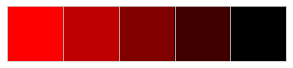

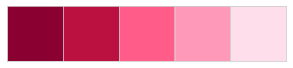

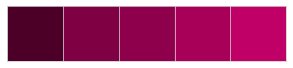

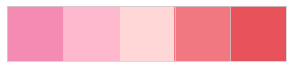

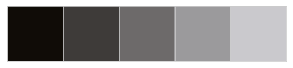

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,5
sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [2]:
heart_df=pd.read_csv('/content/heart1.csv')
heart_df.head().style.background_gradient(cmap='Purples')

,age,sex,cpt,rbp,sc,fbs,rer,mhr,eia,opst,dests,nmvcf,thal,a1p2
0,29,1,2,130,204,0,2,202,0,0.000000,1,0,3,1
1,34,0,2,118,210,0,0,192,0,0.700000,1,0,3,1
2,34,1,1,118,182,0,2,174,0,0.000000,1,0,3,1
3,35,1,4,120,198,0,0,130,1,1.600000,2,0,7,2
4,35,1,4,126,282,0,2,156,1,0.000000,1,0,7,2


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     270 non-null    int64  
 1   sex     270 non-null    int64  
 2   cpt     270 non-null    int64  
 3   rbp     270 non-null    int64  
 4   sc      270 non-null    int64  
 5   fbs     270 non-null    int64  
 6   rer     270 non-null    int64  
 7   mhr     270 non-null    int64  
 8   eia     270 non-null    int64  
 9   opst    270 non-null    float64
 10  dests   270 non-null    int64  
 11  nmvcf   270 non-null    int64  
 12  thal    270 non-null    int64  
 13  a1p2    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


# EDA

In [4]:
def plot_column_distribution(column_name, dataframe, colors):
    """
    Plots the distribution of a specified column in a given dataframe.
    Returns a pie chart and a histogram.
    
    column_name (str): The name of the column to plot.
    dataframe (pandas.DataFrame): The dataframe containing the column data.
    """
    colors = colors[0:dataframe[column_name].nunique()]
    labels = list(dataframe[column_name].unique())
    order = dataframe[column_name].value_counts().index

    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Add a main title to the chart
    fig.suptitle(f'{column_name.capitalize()} Distribution', fontweight='bold', fontsize=16, 
                 fontfamily='sans-serif', color=black_grad[0])

    # Plot Pie Chart
    axs[0].set_title('Pie Chart', fontweight='bold', fontsize=14, 
                      fontfamily='sans-serif', color=black_grad[0])
    axs[0].pie(dataframe[column_name].value_counts(), labels=labels, colors=colors, 
               pctdistance=0.7, autopct='%.2f%%', 
               wedgeprops=dict(alpha=0.8, edgecolor='#4B4B4B'),
               textprops={'fontsize': 12})
    centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='#4B4B4B')
    axs[0].add_artist(centre)

    # Plot Histogram
    axs[1].set_title('Histogram', fontweight='bold', fontsize=14, 
                      fontfamily='sans-serif', color=black_grad[0])
    sns.countplot(x=column_name, data=dataframe, palette=colors, order=order, 
                  edgecolor='#2F4F4F', alpha=0.85, ax=axs[1])
    for rect in axs[1].patches:
        axs[1].text(rect.get_x() + rect.get_width() / 2, 
                    rect.get_height() + 4.25, rect.get_height(),
                    horizontalalignment='center', fontsize=10, 
                    bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                              linewidth=0.25, boxstyle='round'))

    axs[1].set_xlabel(column_name.capitalize(), fontweight='bold', fontsize=11, 
                       fontfamily='sans-serif')
    axs[1].set_ylabel('Total', fontweight='bold', fontsize=11, 
                       fontfamily='sans-serif')
    axs[1].set_xticklabels([label if label in labels else '' for label in order])
    axs[1].grid(axis='y', alpha=0.4)

    plt.show()


## Gender Breakdown

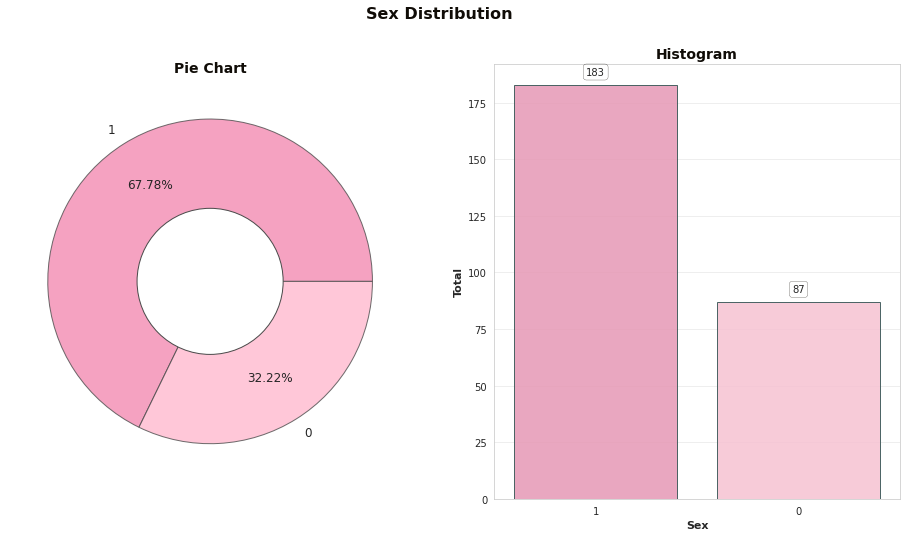

In [5]:
plot_column_distribution('sex', heart_df, color_mix)

## Chest Pain Type

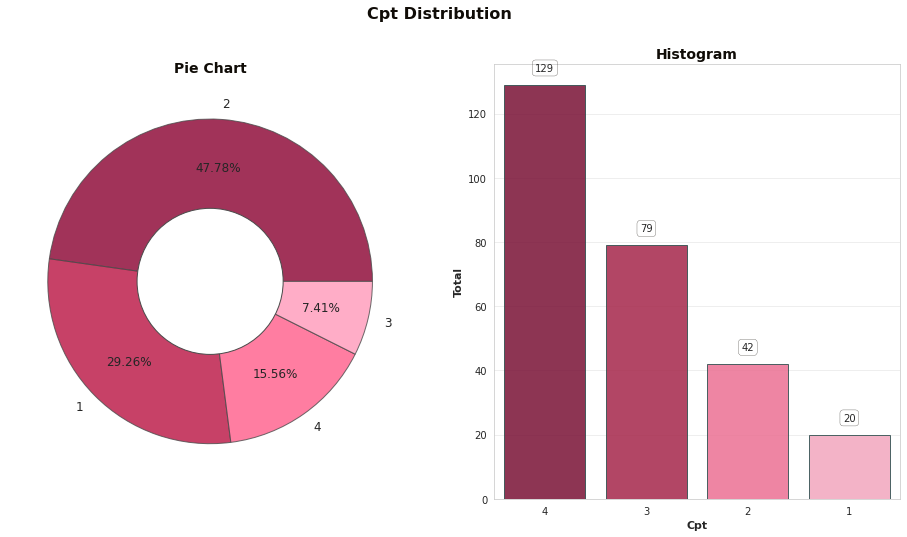

In [6]:
plot_column_distribution('cpt', heart_df, pink_grad)

## Fasting Blood Sugar

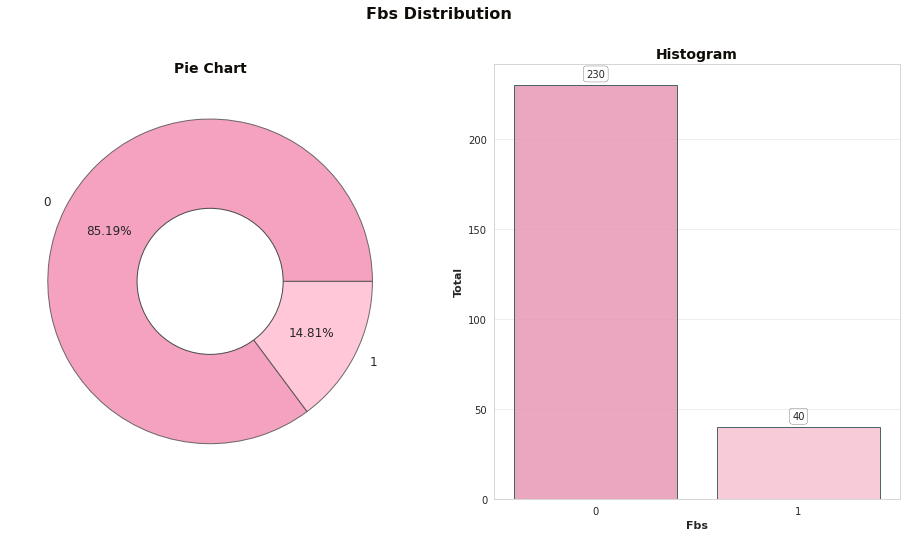

In [7]:
plot_column_distribution('fbs', heart_df, color_mix)

## Resting Electrocardiographic Results

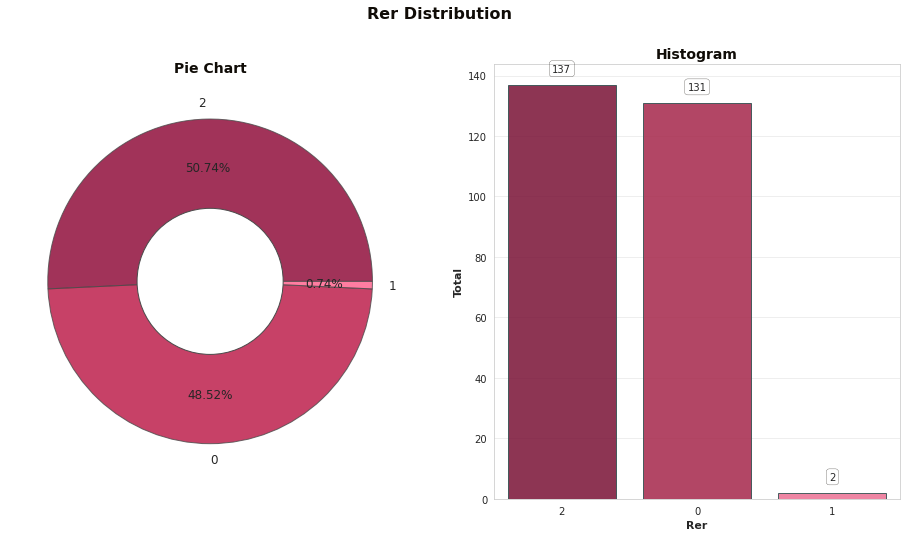

In [8]:
plot_column_distribution('rer', heart_df, pink_grad)

## Exercise Induced Angina

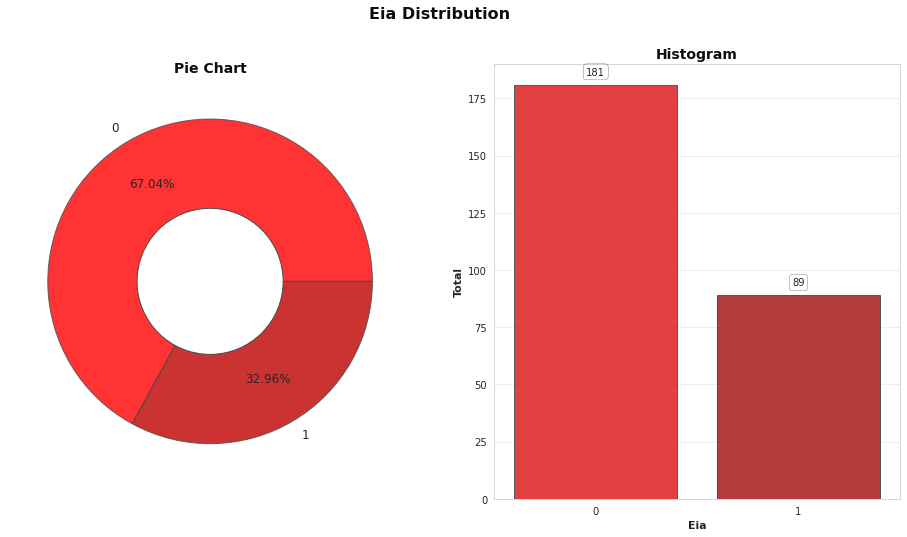

In [9]:
plot_column_distribution('eia', heart_df, red_grad)

## Slope of Peak Exercise

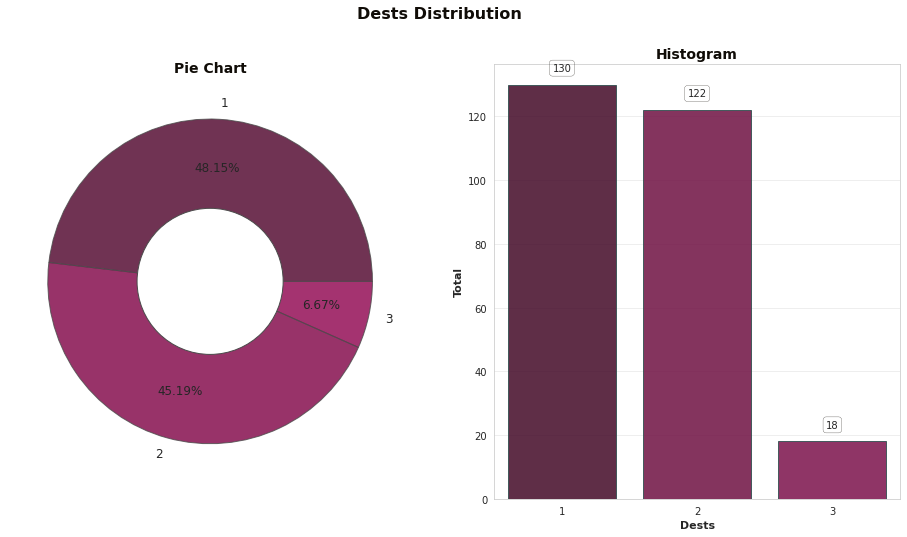

In [10]:
plot_column_distribution('dests', heart_df, purple_grad)

## Number of Major Vessels

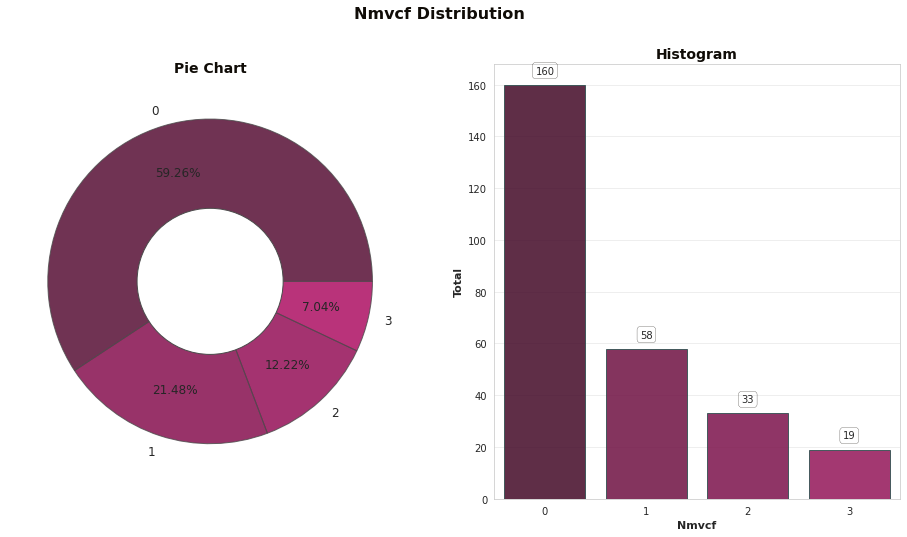

In [11]:
plot_column_distribution('nmvcf', heart_df, purple_grad)

## Thal

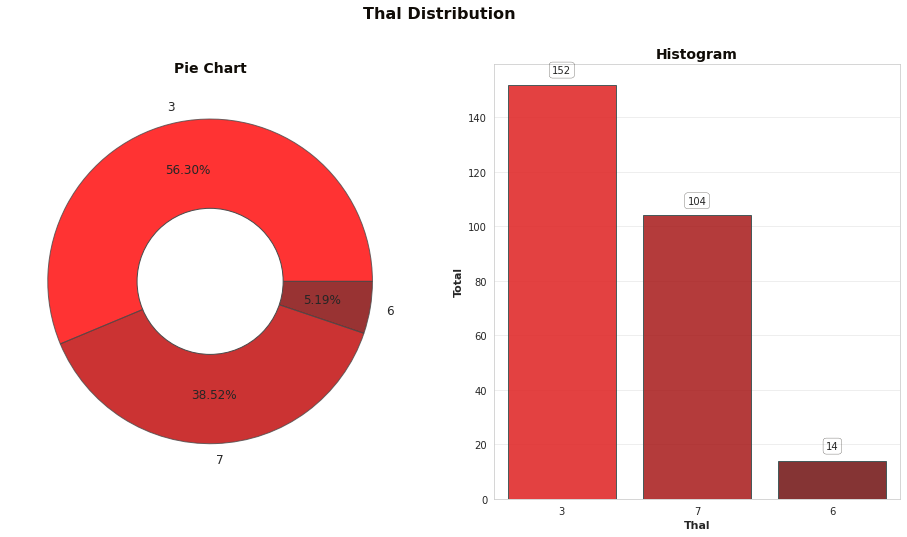

In [12]:
plot_column_distribution('thal', heart_df, red_grad)

## Target

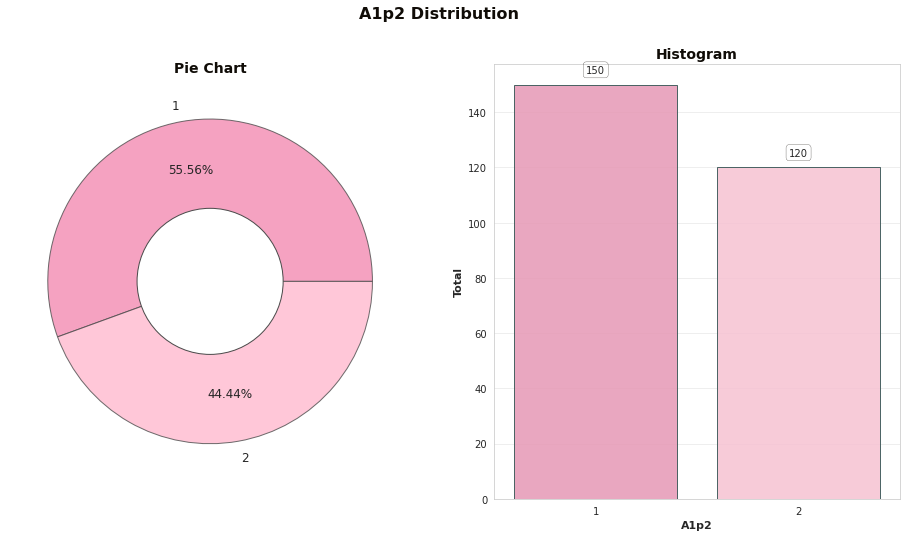

In [13]:
plot_column_distribution('a1p2', heart_df, color_mix)

# Numerical Variables

In [14]:
# --- Descriptive Statistics ---
heart_df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
cpt,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
rbp,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
sc,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
fbs,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
rer,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
mhr,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
eia,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
opst,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


## Correlation Map

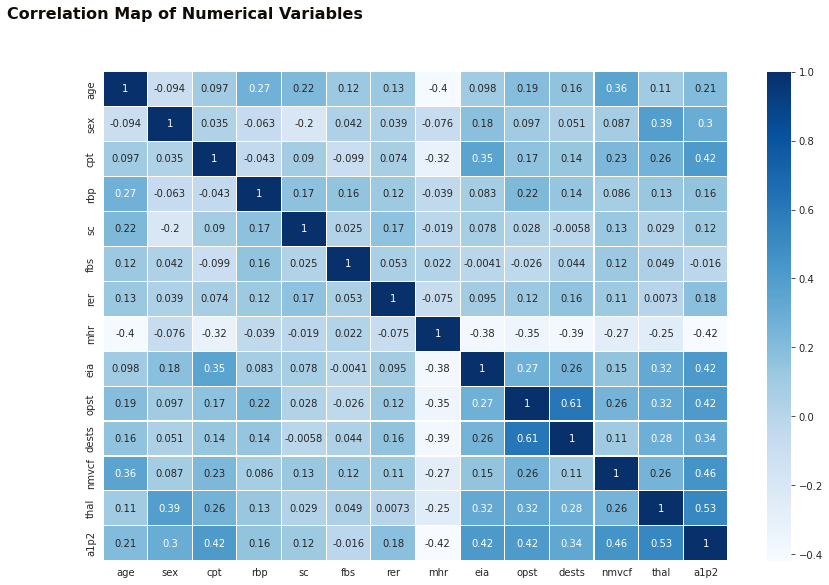

In [16]:
# Correlation Map (Heatmap)
plt.figure(figsize=(14, 9))
sns.heatmap(heart_df.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0]);

In [29]:
from statsmodels.graphics.gofplots import qqplot

def plot_column_distribution(column_name, color_palette, dataframe):
    """
    Plots the distribution of a specified column in a given dataframe using a histogram, 
    a Q-Q plot, and a box plot.
    
    column_name (str): The name of the column to plot.
    color_palette (list): A list of colors to use in the plots.
    dataframe (pandas.DataFrame): The dataframe containing the column data.
    """
    color = color_palette[2]

    # Create figure and axes
    fig = plt.figure(figsize=(12, 12))

    # Add a main title to the chart
    fig.suptitle(f'{column_name.capitalize()} Column Distribution', fontweight='bold', 
                 fontsize=16, fontfamily='sans-serif', color=black_grad[0])
    fig.subplots_adjust(top=0.9)

    # Histogram
    ax_1 = fig.add_subplot(2, 2, 2)
    plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
              fontfamily='sans-serif', color=black_grad[1])
    sns.histplot(data=dataframe, x=column_name, kde=True, color=color)
    plt.xlabel('Total', fontweight='regular', fontsize=11, 
               fontfamily='sans-serif', color=black_grad[1])
    plt.ylabel(column_name.capitalize(), fontweight='regular', fontsize=11, 
               fontfamily='sans-serif', color=black_grad[1])

    # Q-Q Plot
    ax_2 = fig.add_subplot(2, 2, 4)
    plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
              fontfamily='sans-serif', color=black_grad[1])
    qqplot(dataframe[column_name], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
           markeredgecolor=color, alpha=0.6)
    plt.xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11, 
               fontfamily='sans-serif', color=black_grad[1])
    plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
               fontfamily='sans-serif', color=black_grad[1])

    # Box Plot
    ax_3 = fig.add_subplot(1, 2, 1)
    plt.title('Box Plot', fontweight='bold', fontsize=14, 
              fontfamily='sans-serif', color=black_grad[1])
    sns.boxplot(data=dataframe, y=column_name, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
    plt.ylabel(column_name.capitalize(), fontweight='regular', fontsize=11, 
               fontfamily='sans-serif', color=black_grad[1])

    plt.show()


## Age Column Distribution

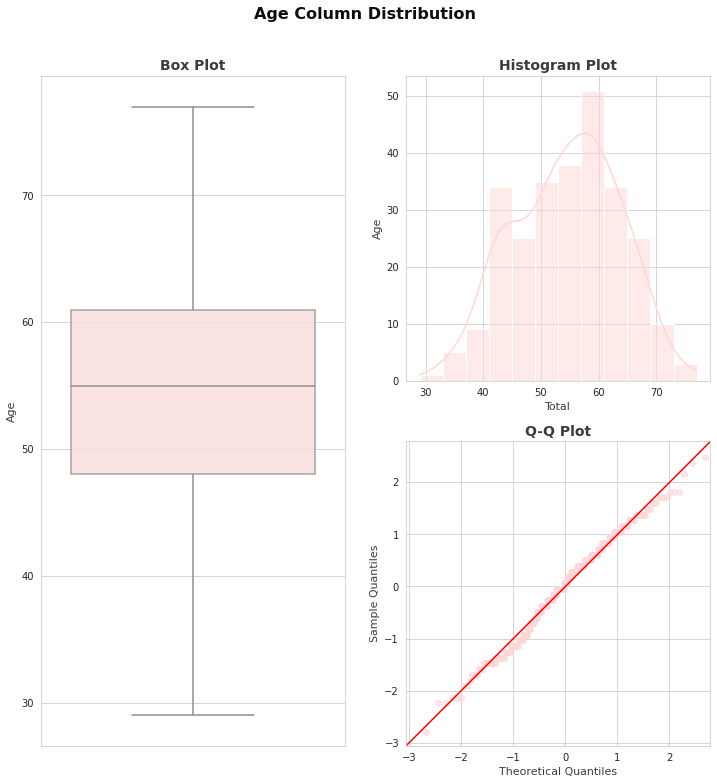

In [30]:
plot_column_distribution('age', color_mix, heart_df)

## Resting Blood Pressure Distribution

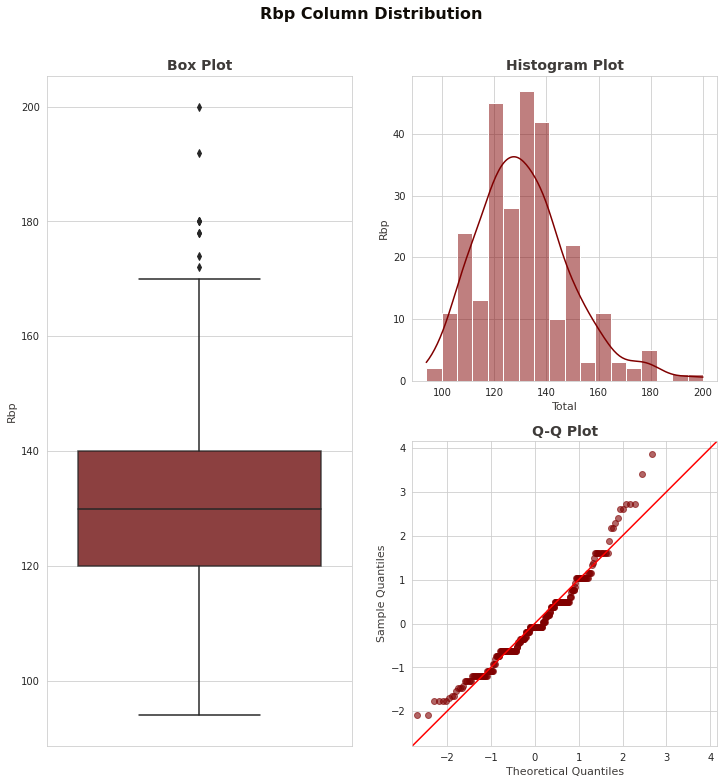

In [31]:
plot_column_distribution('rbp', red_grad, heart_df)

## Serum Cholestrol Distribtion

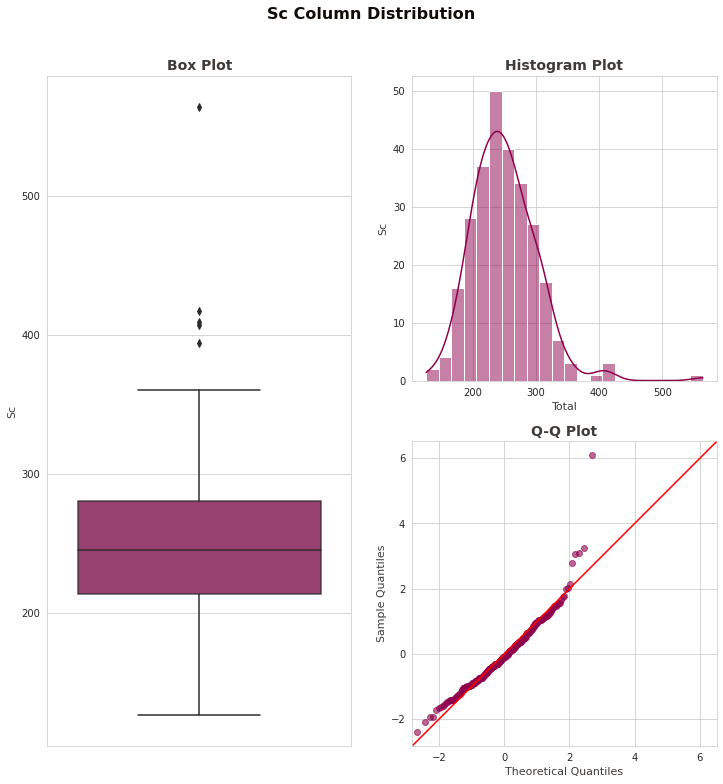

In [32]:
plot_column_distribution('sc', purple_grad, heart_df)

## Maximum Heart Rate Distribution

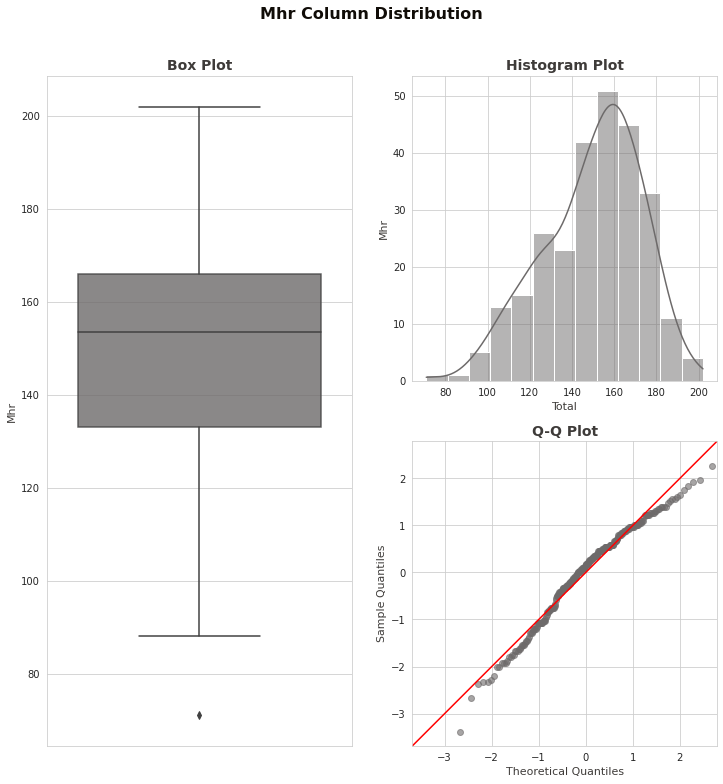

In [33]:
plot_column_distribution('mhr', black_grad, heart_df)

## Oldpeak Distribution

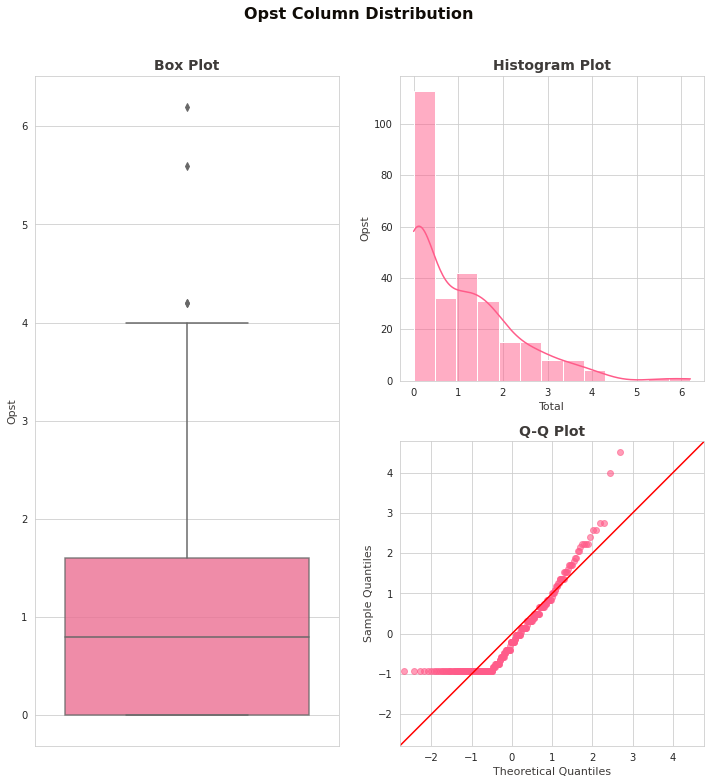

In [34]:
plot_column_distribution('opst', pink_grad, heart_df)